In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_curve,auc

In [7]:
data = pd.read_csv("Iris.csv")
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
X = data.iloc[:,1:5].values
Y = data.iloc[:,5].values
Y = Y == 'Iris-virginica'
Y = Y.astype(int)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 30)


[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.5 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


### VISUALISING THE TARGET VARIABLE

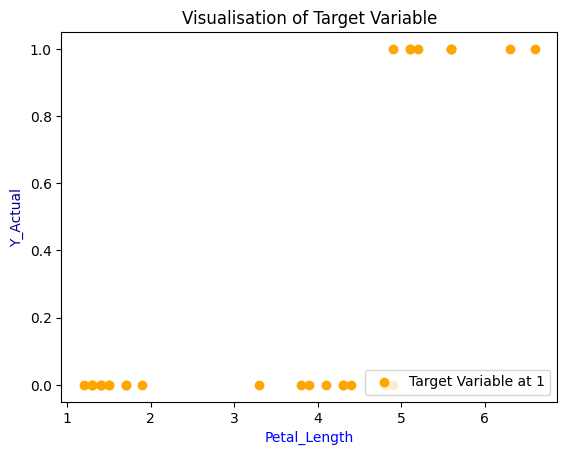

In [57]:
petal = X_test[:,2]
plt.figure()
plt.scatter(petal,Y_test,color='orange',label='Target Variable at 1')
plt.xlabel('Petal_Length',color='blue')
plt.ylabel('Y_Actual',color='darkblue')
plt.title('Visualisation of Target Variable')
plt.legend(loc='lower right')
plt.show()

In [9]:
I = np.ones((X_train.shape[0],1))
X_train = np.hstack((I,X_train))
I1 = np.ones((X_test.shape[0],1))
X_test = np.hstack((I1,X_test))

In [10]:
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])
X_test = X_test.T
Y_test = Y_test.reshape(1,X_test.shape[1])
print(Y_test.shape)

(1, 30)


In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
def model(X,Y,learning_rate,iterations):
    m = X.shape[1]
    n = X.shape[0]
    w = np.zeros((n,1))
    cost_list = []
    for i in range(iterations):
        z = np.dot(w.T,X)
        A = sigmoid(z)

        cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        cost_list.append(cost)
        dw = (1/m)*np.dot(A-Y,X.T)
        w = w - learning_rate*dw.T

    return w,cost_list
    

In [13]:
learning_rate = 0.0015
iterations = 10000
w,cost_list = model(X_train,Y_train,learning_rate=learning_rate,iterations=iterations)


### COST VS EPOCHS GRAPH

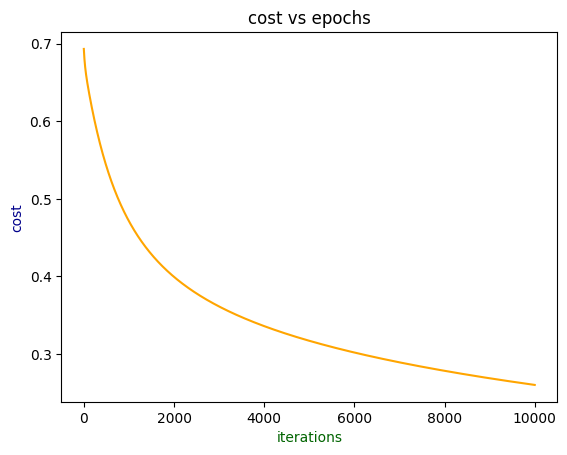

In [66]:
rng = np.arange(0,iterations)
plt.figure()
plt.plot(rng,cost_list,color='orange')
plt.xlabel('iterations',color='darkgreen')
plt.ylabel('cost',color='darkblue')
plt.title('cost vs epochs')
plt.show()

In [14]:

###* true +ve : 1(y_actual) and 1(y_pred)
###* false +ve : 0(y_actual) and 1(y_pred)
###* true -ve : 0(y_actual) and 0(y_pred)
###* false -ve : 1(y_actual) and 0(y_pred)


def confusion(y_pred,y_actual):
    
    true_pos,false_pos,true_neg,false_neg = 0, 0, 0, 0
    
    for pred,actual in zip(y_pred,y_actual):
        if actual == 1 and pred == 1:
            true_pos += 1
        elif actual == 0 and pred == 1:
            false_pos += 1
        elif actual == 0 and pred == 0:
            true_neg += 1
        elif actual == 1 and pred == 0:
            false_neg += 1

    
    return true_pos,false_pos,true_neg,false_neg
            

In [15]:
y_pred = sigmoid(np.dot(w.T,X_test))
####* sigmoid is returning 2D array 

y_pred = y_pred > 0.5
y_pred = np.array(y_pred,dtype = 'int32')


#### CONFUSION MATRIX

In [16]:
true_pos, false_pos, true_neg, false_neg = confusion(y_pred[0],Y_test[0])
confusion_matrix = np.array([[true_neg, false_pos], [false_neg, true_pos]])
print(confusion_matrix)

[[19  2]
 [ 0  9]]


### ACCURACY, PRECISION, F1, TPR, FPR, TNR, FNR 

In [ ]:

### arguments of for the following  functions should be 1D array or just pass column vector

acc = accuracy_score(Y_test[0],y_pred[0])
###*  It measures the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. 
print(acc)

prec = precision_score(Y_test[0].T,y_pred[0])
###*  Of all the instances predicted as positive, how many are actually positive?
###*  Precision = True Positives / True Positives+False Positives
print(prec)

F1 = f1_score(Y_test[0],y_pred[0])
###*   It is a measure of a model's accuracy on a particular dataset. The F1 score reaches its best value at 1 and worst at 0.
###*   F1 = 2 × (Precision+Recall/  Precision×Recall)
print(F1)

TPR = recall_score(Y_test[0],y_pred[0])
###*  Of all the actual positive instances, how many were correctly classified as positive?
###*  Recall  or sensitivity or tpr(true positive rate) = True Positives / True Positives+False Negatives
print(TPR)

FPR = false_pos/(true_neg+false_pos)
###* false positive rate(fpr) : The False Positive Rate is defined as the ratio of negative instances that are incorrectly classified as positive to the
## * total number of actual negative instances
###*  FPR = False Positives /  False Positives+True Negatives
print(FPR)

TNR = 1- FPR
###* specificity or true negative rate : Specificity measures the proportion of actual negative instances that are 
###* correctly identified as negative by the classifier.
###* Specificity = True Negatives / True Negatives+False Positives
print(TNR)

FNR = false_neg / (false_neg + true_pos)
###* False negative rate or Miss Rate :  It measures the proportion of actual positive instances that are 
###* incorrectly classified as negative by the classifier.
###* FNR = False Negatives /  False Negatives+True Positives
print(FNR)


#### AUC AND ROC CURVE

In [19]:
fpr, tpr, _ = roc_curve(Y_test[0],y_pred[0])
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9523809523809523


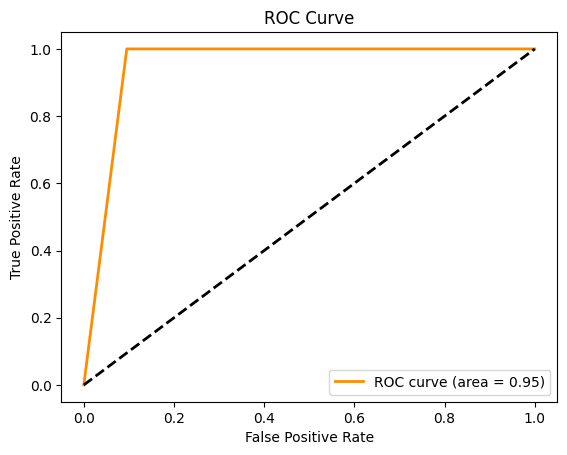

In [28]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color='black',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()